In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# split iris data in train and test data
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
iris_y_test_predict = knn.predict(iris_X_test)
print(iris_y_test_predict, iris_y_test)

(array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0]), array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0]))


In [3]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)
print(np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2))
print(regr.score(diabetes_X_test, diabetes_y_test))

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
2004.56760269
0.585075302269


/Users/haidm/HAI/mldl/.venv/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [4]:
# digits dataset
digits = datasets.load_digits()
# split data in train and test data
np.random.seed(0)
indices = np.random.permutation(len(digits.data))
digits_X_train = digits.data[indices[:-10]]
digits_y_train = digits.target[indices[:-10]]
digits_X_test = digits.data[indices[-10:]]
digits_y_test = digits.target[indices[-10:]]
print(digits_y_test)

# train with KNeighborsClassifier
print('train with KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(digits_X_train, digits_y_train)
result = knn.predict(digits_X_test)
sqerr = np.mean((result-digits_y_test)**2)
print('Result: ', result)
print('Squared Error: ', sqerr)
print(knn.score(digits_X_test, digits_y_test))

# train with LogisticRegression
print('train with LogisticRegression')
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(digits_X_train, digits_y_train)
result = logreg.predict(digits_X_test)
sqerr = np.mean((result-digits_y_test)**2)
print('Result: ', result)
print('Squared Error: ', sqerr)
print(logreg.score(digits_X_test, digits_y_test))


[1 4 8 4 5 3 3 7 7 8]
train with KNeighborsClassifier
('Result: ', array([1, 4, 8, 4, 5, 3, 3, 7, 7, 8]))
('Squared Error: ', 0.0)
1.0
train with LogisticRegression
('Result: ', array([8, 4, 8, 4, 5, 3, 3, 7, 7, 8]))
('Squared Error: ', 4.9000000000000004)
0.9


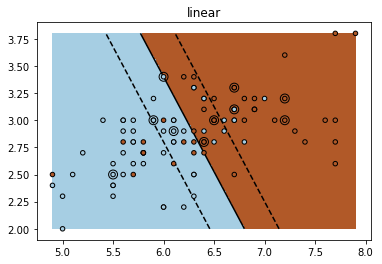

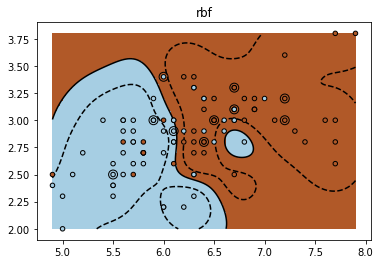

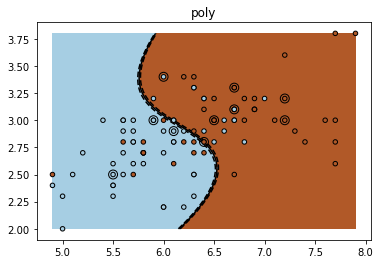

In [10]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

m = len(X)
m9 = int(.9*m)
indies = np.random.permutation(m)
X = X[indies]
y = y[indies]

X_train = X[:m9]
y_train = y[:m9]
X_test = X[m9:]
y_test = y[m9:]

from sklearn import svm
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()